<a href="https://colab.research.google.com/github/jyothsna1076/AnamolyDetectionPRMLProject/blob/main/guassian_naive_bayes_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from collections import defaultdict
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report
import joblib
from sklearn.metrics import confusion_matrix

## Mounting Google drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preprocessing


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Train_data.csv') #reading the csv file
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Data Inspects


In [4]:
print(data.shape) # shape of data
print(data.info()) # data info
print(data.describe()) # descrpition of data

(25192, 42)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root

## Checking for Null values


In [5]:
print(data.isnull().sum()) # checking for null values

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

## Checking for duplicates values

In [6]:
# Remove duplicates
data.drop_duplicates(inplace=True)
# Standardize string columns
for col in data.columns:
    data[col] = data[col].astype(str).str.lower().str.strip()
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,sf,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0,udp,other,sf,146,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,private,s0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,anomaly
3,0,tcp,http,sf,232,8153,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal
4,0,tcp,http,sf,199,420,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal


## Encoding Categorical Columns


In [7]:
# encodeing catergorical columns
encoding_dict = {
    "protocol_type": LabelEncoder(),
    "service": LabelEncoder(),
    "flag": LabelEncoder()
}

def le(df, enc_dict):
    for col in enc_dict.keys():
        le = enc_dict[col]
        df[col] = le.fit_transform(df[col])

le(data, encoding_dict)
# data.drop(['num_outbound_cmds'], axis=1, inplace=True, errors='ignore')
data['class'] = data['class'].map({'normal': 0, 'anomaly': 1})
data.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   duration                     25192 non-null  object
 1   protocol_type                25192 non-null  int64 
 2   service                      25192 non-null  int64 
 3   flag                         25192 non-null  int64 
 4   src_bytes                    25192 non-null  object
 5   dst_bytes                    25192 non-null  object
 6   land                         25192 non-null  object
 7   wrong_fragment               25192 non-null  object
 8   urgent                       25192 non-null  object
 9   hot                          25192 non-null  object
 10  num_failed_logins            25192 non-null  object
 11  logged_in                    25192 non-null  object
 12  num_compromised              25192 non-null  object
 13  root_shell                   25

## Plot for Data Target labels


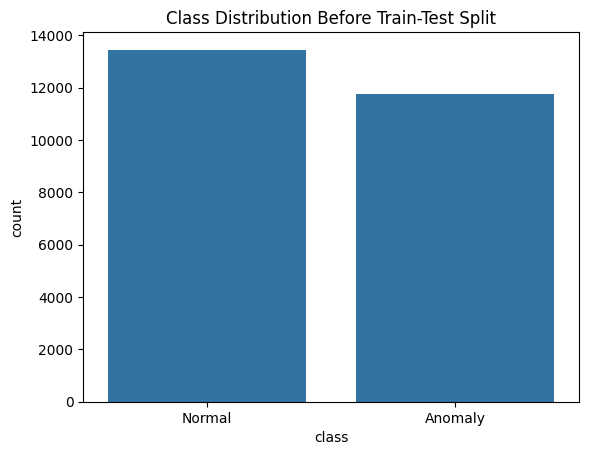

In [8]:

sns.countplot(x='class', data=data)
plt.title('Class Distribution Before Train-Test Split')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.show()




## HeatMap


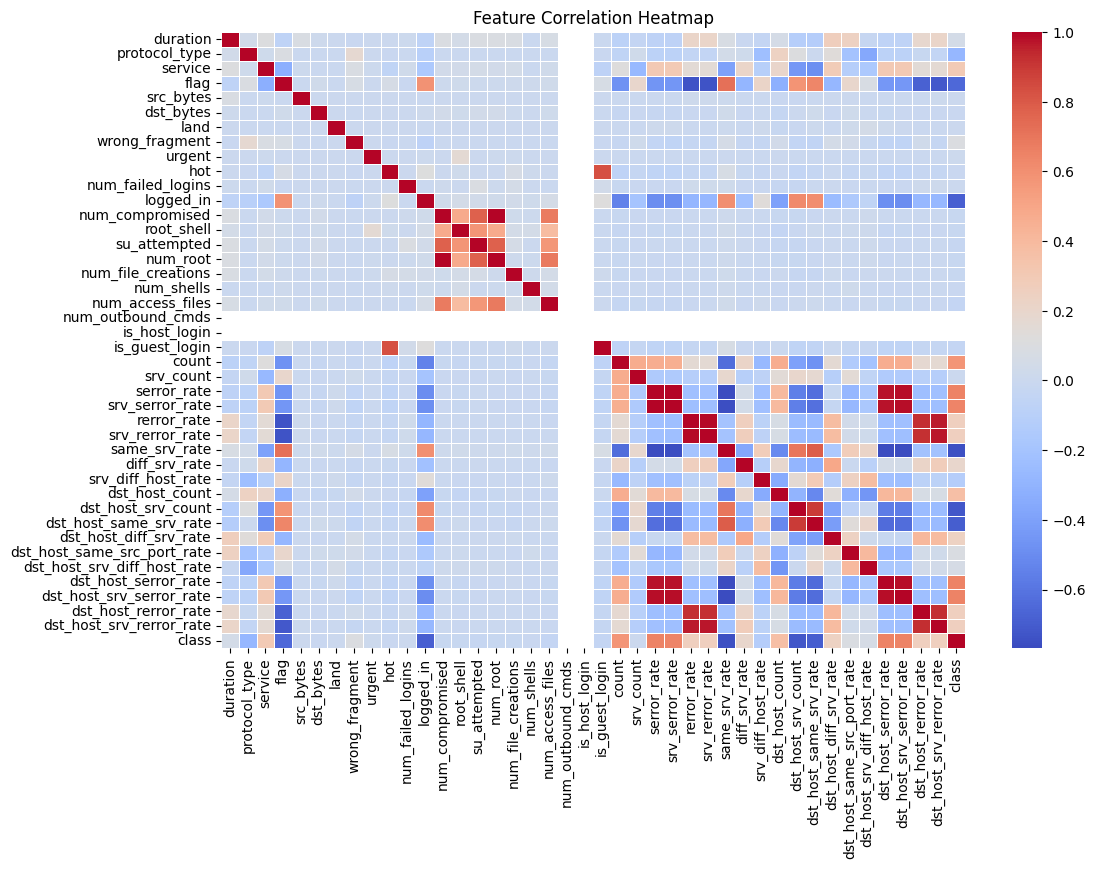

In [9]:
# Compute correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
X_train = data.drop(['class'], axis=1)
y_train = data['class']
print(X_train.shape)
print(y_train.shape)

(25192, 41)
(25192,)


## Feature Selection using randomforestclassifier


In [11]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # initilization of object of  the randomforestclassifer model
rf_model.fit(X_train, y_train) # fitting the X_train in model
feature_importances = rf_model.feature_importances_ # feature importance
print(feature_importances)

[3.92994101e-03 3.38097622e-02 2.35754019e-02 6.64015122e-02
 1.86342201e-01 1.10358830e-01 2.32750255e-05 5.03009486e-03
 3.71663923e-05 8.97978818e-03 1.66583671e-04 4.63107140e-02
 5.70325805e-03 1.56170871e-04 5.21035589e-05 4.01278753e-04
 1.86572590e-04 8.37318732e-06 1.17446216e-04 0.00000000e+00
 0.00000000e+00 1.09232308e-03 3.35451487e-02 1.49100722e-02
 3.37537720e-02 2.94003184e-02 4.16915929e-03 3.67256574e-03
 7.52202519e-02 3.53395012e-02 2.52036765e-03 1.32529575e-02
 6.89576825e-02 6.26630984e-02 2.97903686e-02 2.86542527e-02
 1.91790138e-02 1.73436779e-02 1.18756111e-02 1.54372551e-02
 7.63212862e-03]


## selecting the top-20 features and plotting


Top selected features: ['src_bytes', 'dst_bytes', 'same_srv_rate', 'dst_host_srv_count', 'flag', 'dst_host_same_srv_rate', 'logged_in', 'diff_srv_rate', 'protocol_type', 'serror_rate', 'count', 'dst_host_diff_srv_rate', 'srv_serror_rate', 'dst_host_same_src_port_rate', 'service', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'srv_count', 'dst_host_count']


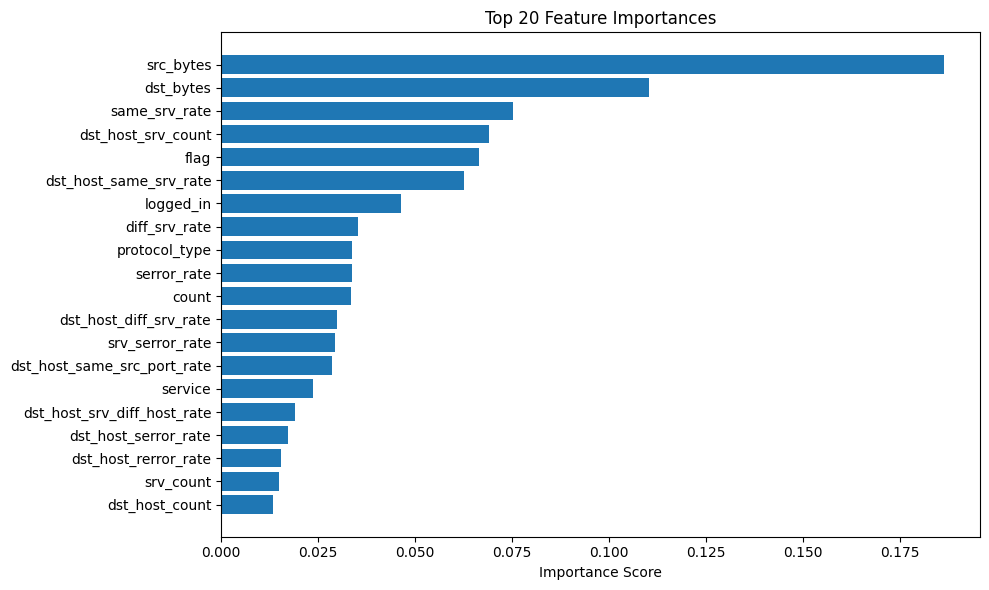

In [12]:
# Set the number of top features to select
top_n = 20

# Get the indices of the top features based on feature importance scores
# argsort sorts the feature importances in ascending order, [::-1] reverses it for descending order
# [:top_n] selects the top 'n' indices
top_features_idx = np.argsort(feature_importances)[::-1][:top_n]

# Get the names of the selected features using the indices
selected_features = X_train.columns[top_features_idx]

# Create a new DataFrame containing only the selected features
X_train_selected = X_train[selected_features]

# Print the list of selected features
print("Top selected features:", list(selected_features))

# Create a horizontal bar plot to visualize feature importances
plt.figure(figsize=(10, 6))  # Set the figure size
plt.barh(selected_features, feature_importances[top_features_idx])  # Create the horizontal bar plot
plt.title("Top 20 Feature Importances")  # Set the plot title
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important feature at the top
plt.xlabel("Importance Score")  # Set the x-axis label
plt.tight_layout()  # Adjust the plot layout to prevent overlapping elements
plt.show()  # Display the plot

## Normalize the data

In [13]:
scaler = StandardScaler() # initilaiztion of object of StandardScaler class
X_train_scaled = scaler.fit_transform(X_train_selected) # scaling the X_train
print(X_train_scaled)



[[-0.00988885 -0.03930979  0.77210866 ... -0.22166806 -0.35462794
  -0.32863359]
 [-0.01003196 -0.03930979 -1.32056658 ... -0.38513984 -0.36842737
   0.73205893]
 [-0.01009252 -0.03930979 -1.38880599 ... -0.38513984 -0.29943026
   0.73205893]
 ...
 [-0.01009252 -0.03930979 -1.34331305 ...  2.88429591 -0.28563083
   0.73205893]
 [-0.01009252 -0.03930979 -1.18408776 ... -0.38513984 -0.13383719
   0.73205893]
 [-0.01009252 -0.03930979 -0.95662306 ... -0.38513984 -0.25803199
   0.73205893]]


## Splitting the dataset

In [14]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
) # 80% -training 20 % testing


## My GaussianNaiveBayes Class


In [15]:

class MyGaussianNaiveBayes:
    def __init__(self, epsilon=1e-9):
        self.class_probabilities = {}
        self.class_means = {}
        self.class_variances = {}
        self.epsilon = epsilon

    def fit(self, X, y):
        classes = np.unique(y)
        self.class_probabilities = {class_label: np.sum(y == class_label) / len(y) for class_label in classes}

        self.class_means = {}
        self.class_variances = {}

        for class_label in classes:
            X_class = X[y == class_label]
            self.class_means[class_label] = np.mean(X_class, axis=0)
            self.class_variances[class_label] = np.var(X_class, axis=0) + self.epsilon

    def gaussian_pdf(self, x, mean, var):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x - mean) ** 2) / var)

    def predict(self, X):
        predictions = []
        for x in X:
            class_probs = {}
            for class_label in self.class_probabilities:
                prob = np.log(self.class_probabilities[class_label])
                for i, feature_value in enumerate(x):
                    mean = self.class_means[class_label][i]
                    var = self.class_variances[class_label][i]
                    pdf_val = self.gaussian_pdf(feature_value, mean, var)
                    prob += np.log(pdf_val + self.epsilon)  # Add epsilon here too
                class_probs[class_label] = prob
            predicted_class = max(class_probs, key=class_probs.get)
            predictions.append(predicted_class)
        return np.array(predictions)


## Training the model and computing accuracy


In [17]:
import time
start_time=time.time()
nb_model = MyGaussianNaiveBayes()
nb_model.fit(X_train_split, y_train_split)
end_time=time.time()
print(f"Training Time: {end_time-start_time:.2f} seconds")
train_preds = nb_model.predict(X_train_split)
val_preds = nb_model.predict(X_test_split)

print(f"Train Accuracy: {accuracy_score(y_train_split, train_preds) * 100:.2f}%")
print(f"Validation Accuracy: {accuracy_score(y_test_split, val_preds) * 100:.2f}%")


Training Time: 0.01 seconds
Train Accuracy: 89.48%
Validation Accuracy: 90.63%


## Confusion Matrix on test data and Classification report

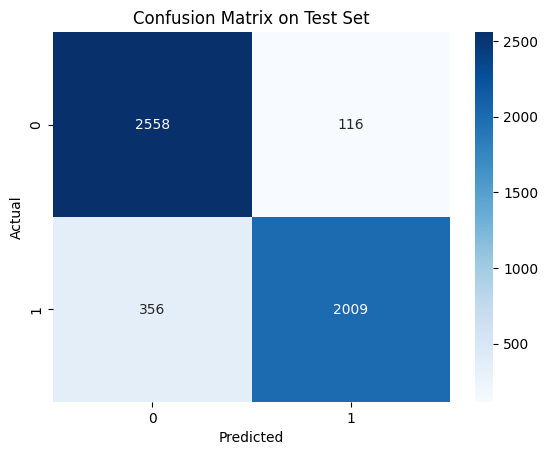

              precision    recall  f1-score   support

      Normal       0.88      0.96      0.92      2674
     Anomaly       0.95      0.85      0.89      2365

    accuracy                           0.91      5039
   macro avg       0.91      0.90      0.91      5039
weighted avg       0.91      0.91      0.91      5039



In [18]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_conf_matrix(y_test_split, nb_model.predict(X_test_split), "Confusion Matrix on Test Set")
print(classification_report(y_test_split, val_preds, target_names=["Normal", "Anomaly"]))

## Dumping pkl of all model

In [19]:
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(selected_features.tolist(), 'selected_features.pkl')
joblib.dump(encoding_dict, 'all_label_encoders.pkl')

['all_label_encoders.pkl']

## Predicting labels

In [20]:
# Function to predict labels based on input features
def predict_labels_for_test_data(test_data, encoder_dict, selected_features, scaler, nb_model):
    # Encode categorical columns
    test_data_encoded = test_data.copy()
    for col, encoder in encoder_dict.items():
        # Get a list of known labels from the encoder
        known_labels = encoder.classes_.tolist()

        # Find unknown labels in the test data
        unknown_labels = set(test_data_encoded[col]) - set(known_labels)

        # Replace unknown labels with a placeholder (e.g., 'unknown')
        if unknown_labels:
            test_data_encoded[col] = test_data_encoded[col].apply(lambda x: x if x in known_labels else 'unknown')
            # Add 'unknown' to the encoder's classes_ for transformation
            encoder.classes_ = np.append(encoder.classes_, 'unknown')

        test_data_encoded[col] = encoder.transform(test_data_encoded[col])

    # Feature selection (same as training)
    test_data_encoded_selected = test_data_encoded[selected_features]

    # Scale the selected features
    test_data_scaled = scaler.transform(test_data_encoded_selected)

    #  Make predictions
    predictions = nb_model.predict(test_data_scaled)

    # Count predictions
    normal_count = np.sum(predictions == 0)
    anomaly_count = np.sum(predictions == 1)

    # Create prediction DataFrame
    pred_df = pd.DataFrame(predictions, columns=['predicted_class'])

    # Step 7: Print counts
    print(f"Number of Normal Points: {normal_count}")
    print(f"Number of Anomaly Points: {anomaly_count}")


    # 1️ Bar plot of predictions
    plt.figure(figsize=(6, 4))
    sns.countplot(x='predicted_class', data=pred_df, palette='Set2')
    plt.title('Predicted Class Distribution')
    plt.xticks([0, 1], ['Normal', 'Anomaly'])
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')
    plt.grid(axis='y')
    plt.show()

    # 2️ Pie chart of predictions
    plt.figure(figsize=(5, 5))
    plt.pie([normal_count, anomaly_count],
            labels=['Normal', 'Anomaly'],
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66b3ff', '#ff6666'])
    plt.title('Normal vs Anomaly Distribution')
    plt.axis('equal')
    plt.show()

    return pred_df, normal_count, anomaly_count

Number of Normal Points: 15037
Number of Anomaly Points: 7507


<ipython-input-20-5acbbf37f74b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_class', data=pred_df, palette='Set2')


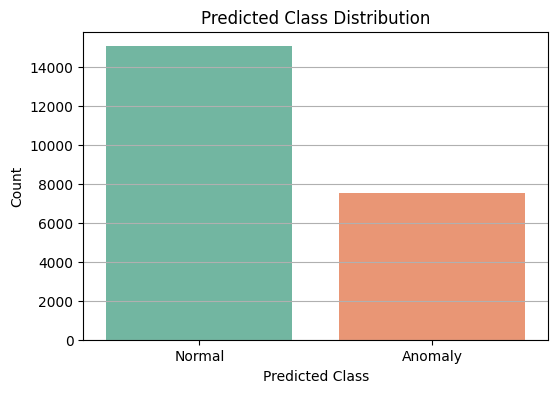

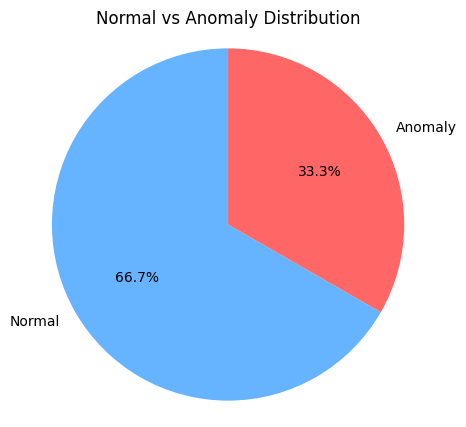

In [22]:
test_data = pd.read_csv('/content/drive/MyDrive/Test_data.csv')

nb_model = joblib.load('naive_bayes_model.pkl')
scaler = joblib.load('scaler.pkl')
selected_features = joblib.load('selected_features.pkl')
encoding_dict = joblib.load('all_label_encoders.pkl')

pred_df, normal_count, anomaly_count = predict_labels_for_test_data(
    test_data, encoding_dict, selected_features, scaler, nb_model
)


## Generating dataset for real network analysis

In [23]:
!pip install scapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.0 MB/s eta 0:00:00


In [26]:
import csv
import os
from scapy.all import sniff, IP, TCP, UDP
from collections import defaultdict, deque
import time
import socket
import threading

# ======= File setup =======
csv_file_path = "real_time_nids_features.csv"
csv_header = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate",
    "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
    "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate"
]

# Write header only once
if not os.path.exists(csv_file_path):
    with open(csv_file_path, mode='w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(csv_header)

# ======= Flow tracking setup =======
flows = defaultdict(lambda: {
    'start_time': None,
    'end_time': None,
    'src_bytes': 0,
    'dst_bytes': 0,
    'count': 0,
    'services': set(),
    'dst_hosts': set(),
    'ports': set(),
    'tcp_flags': [],
    'logged_in': 0,
})

window = deque(maxlen=1000)
window_duration = 2  # seconds

# ======= Valid values from training data =======
valid_protocols = {'tcp', 'udp', 'icmp'}
valid_services = {
    'ftp_data', 'other', 'private', 'http', 'remote_job', 'name', 'netbios_ns',
    'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50',
    'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp',
    'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
    'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell',
    'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier',
    'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2',
    'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
    'http_8001'
}
valid_flags = {'SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH'}

# Functions for mapping ports and flags
def map_port_to_service(port):
    common_ports = {
        20: 'ftp_data',
        21: 'ftp',
        22: 'ssh',
        23: 'telnet',
        25: 'smtp',
        53: 'domain',
        69: 'tftp_u',
        80: 'http',
        110: 'pop_3',
        111: 'sunrpc',
        119: 'nntp',
        123: 'ntp_u',
        135: 'epmap',
        137: 'netbios_ns',
        138: 'netbios_dgm',
        139: 'netbios_ssn',
        143: 'imap4',
        161: 'snmp',
        162: 'snmptrap',
        179: 'bgp',
        443: 'https',
        445: 'microsoft_ds',
        513: 'login',
        514: 'shell',
        515: 'printer',
        520: 'route',
        540: 'uucp',
        635: 'mountd',
        8080: 'http',
    }

    if port in common_ports:
        return common_ports[port]
    elif port >= 1024:
        return 'private'
    else:
        return 'other'

def map_flags_to_dataset(flag):
    if flag in ['PA', 'A', 'P', 'FA', 'F']:
        return 'SF'
    elif flag == 'S':
        return 'S0'
    elif flag in ['R', 'RA']:
        return 'REJ'
    else:
        return 'OTH'

# Function to extract features from packets
def extract_features(pkt):
    try:
        if not IP in pkt:
            return

        ip = pkt[IP]
        proto = ip.proto
        now = time.time()

        if TCP in pkt or UDP in pkt:
            sport = pkt.sport
            dport = pkt.dport
        else:
            sport = dport = 0

        key = (ip.src, ip.dst, sport, dport, proto)
        flow = flows[key]

        if flow['start_time'] is None:
            flow['start_time'] = now
        flow['end_time'] = now
        flow['count'] += 1

        size = len(pkt)
        if ip.src == key[0]:
            flow['src_bytes'] += size
        else:
            flow['dst_bytes'] += size

        service_name = map_port_to_service(dport)
        flow['services'].add(service_name)
        flow['dst_hosts'].add(ip.dst)
        flow['ports'].add(dport)

        if TCP in pkt:
            tcp = pkt[TCP]
            flow['tcp_flags'].append(tcp.flags)
            if tcp.flags == "S":
                flow['logged_in'] = 0
            if tcp.flags == "PA":
                flow['logged_in'] = 1

        window.append({
            'src': ip.src,
            'dst': ip.dst,
            'proto': proto,
            'service': service_name,
            'timestamp': now
        })

        duration = flow['end_time'] - flow['start_time']
        protocol_type = {6: 'tcp', 17: 'udp', 1: 'icmp'}.get(proto, 'other')
        service = list(flow['services'])[0] if flow['services'] else '0'
        raw_flag = flow['tcp_flags'][-1] if flow['tcp_flags'] else '0'
        flag = map_flags_to_dataset(str(raw_flag))
        src_bytes = flow['src_bytes']
        dst_bytes = flow['dst_bytes']
        land = 1 if ip.src == ip.dst and sport == dport else 0

        # === SKIP IF NOT IN TRAINING DATA ===
        if protocol_type not in valid_protocols or service not in valid_services or flag not in valid_flags:
            print(f"[!] Unknown protocol/service/flag encountered, skipping: {protocol_type}, {service}, {flag}")
            return

        # Placeholder values
        wrong_fragment = 0
        urgent = 0
        hot = 0
        num_failed_logins = 0
        logged_in = flow['logged_in']
        num_compromised = 0
        root_shell = 0
        su_attempted = 0
        num_root = 0
        num_file_creations = 0
        num_shells = 0
        num_access_files = 0
        num_outbound_cmds = 0
        is_host_login = 0
        is_guest_login = 0

        recent = [w for w in window if now - w['timestamp'] <= window_duration]
        count = len([w for w in recent if w['dst'] == ip.dst])
        srv_count = len([w for w in recent if w['dst'] == ip.dst and w['service'] == service])

        same_srv_rate = srv_count / count if count else 0
        diff_srv_rate = 1 - same_srv_rate

        # Host-related metrics as placeholders
        serror_rate = 0
        srv_serror_rate = 0
        rerror_rate = 0
        srv_rerror_rate = 0
        srv_diff_host_rate = 0
        dst_host_count = count
        dst_host_srv_count = srv_count
        dst_host_same_srv_rate = same_srv_rate
        dst_host_diff_srv_rate = diff_srv_rate
        dst_host_same_src_port_rate = 0
        dst_host_srv_diff_host_rate = 0
        dst_host_serror_rate = 0
        dst_host_srv_serror_rate = 0
        dst_host_rerror_rate = 0
        dst_host_srv_rerror_rate = 0

        features = [
            duration, protocol_type, service, flag, src_bytes, dst_bytes, land,
            wrong_fragment, urgent, hot, num_failed_logins, logged_in, num_compromised,
            root_shell, su_attempted, num_root, num_file_creations, num_shells,
            num_access_files, num_outbound_cmds, is_host_login, is_guest_login,
            count, srv_count, serror_rate, srv_serror_rate, rerror_rate,
            srv_rerror_rate, same_srv_rate, diff_srv_rate, srv_diff_host_rate,
            dst_host_count, dst_host_srv_count, dst_host_same_srv_rate,
            dst_host_diff_srv_rate, dst_host_same_src_port_rate,
            dst_host_srv_diff_host_rate, dst_host_serror_rate,
            dst_host_srv_serror_rate, dst_host_rerror_rate,
            dst_host_srv_rerror_rate
        ]

        with open(csv_file_path, mode='a', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(features)

        print("Captured:", features[:5], "...")

    except Exception as e:
        print(f"[!] Skipping malformed packet: {e}")

# ======= Sniffing for 60 seconds =======
def start_sniffing(iface):
    print("[*] Capturing packets & writing to:", csv_file_path)
    stop_time = time.time() + 30  # 60 seconds from now
    sniff(prn=extract_features, store=0, timeout=30)  # Automatically stops after 60 seconds

if __name__ == "__main__":
    from scapy.all import get_if_list
    interfaces = get_if_list()
    print("Available interfaces:", interfaces)
    start_sniffing(interfaces[0])


Available interfaces: ['lo', 'eth0']
[*] Capturing packets & writing to: real_time_nids_features.csv
Captured: [0.0, 'tcp', 'private', 'SF', 7306] ...
Captured: [0.0, 'tcp', 'http', 'SF', 66] ...
Captured: [0.0020775794982910156, 'tcp', 'private', 'SF', 9579] ...
Captured: [0.002002716064453125, 'tcp', 'http', 'SF', 132] ...
Captured: [0.18416595458984375, 'tcp', 'private', 'SF', 10595] ...
Captured: [0.18629789352416992, 'tcp', 'http', 'SF', 198] ...
Captured: [0.0, 'tcp', 'http', 'SF', 80] ...
Captured: [0.0, 'tcp', 'private', 'SF', 66] ...
Captured: [0.3886988162994385, 'tcp', 'private', 'SF', 11504] ...
Captured: [0.38901448249816895, 'tcp', 'http', 'SF', 264] ...
Captured: [0.5931415557861328, 'tcp', 'private', 'SF', 12317] ...
Captured: [0.5935213565826416, 'tcp', 'http', 'SF', 330] ...
Captured: [0.3557462692260742, 'tcp', 'private', 'SF', 913] ...
Captured: [0.35860514640808105, 'tcp', 'http', 'SF', 146] ...
Captured: [0.4018564224243164, 'tcp', 'private', 'SF', 1188] ...
Captu

Number of Normal Points: 818
Number of Anomaly Points: 16


<ipython-input-20-5acbbf37f74b>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_class', data=pred_df, palette='Set2')


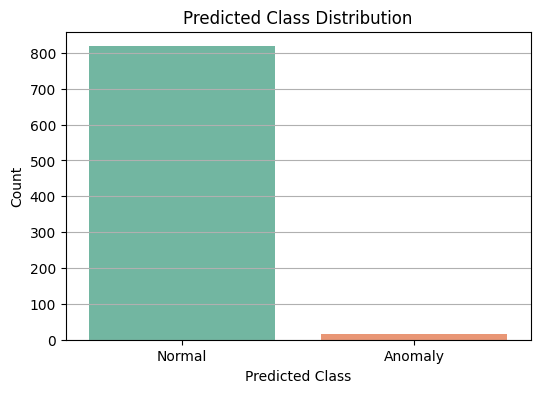

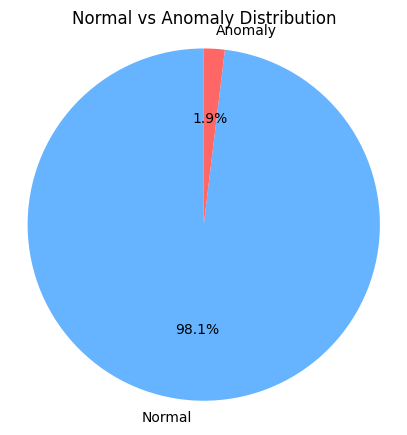

In [27]:
test_data = pd.read_csv('/content/real_time_nids_features.csv')

nb_model = joblib.load('naive_bayes_model.pkl')
scaler = joblib.load('scaler.pkl')
selected_features = joblib.load('selected_features.pkl')
encoding_dict = joblib.load('all_label_encoders.pkl')

pred_df, normal_count, anomaly_count = predict_labels_for_test_data(
    test_data, encoding_dict, selected_features, scaler, nb_model
)
